In [80]:
import mpy
import numpy as np
import matplotlib.pyplot as plt
import mpy.fitting as fitting
from typing import List, Tuple

In [81]:
def getSampleS(theta: np.ndarray) -> np.ndarray:
    return 0.4*np.sin(theta) + 0.1*np.cos(2*theta+1) + 0.02*np.sin(5*theta-2)

In [82]:
sampleNums = 30
sampleTheta = np.random.rand(sampleNums) *2*np.pi
sampleS = getSampleS(sampleTheta) + 0.05*np.random.rand(sampleNums)

In [83]:
xm, coeffSin, coeffCos = fitting.fitPeriodicCurve(sampleTheta, sampleS, mpol=5, verbose=2)

def getS(theta: np.ndarray) -> np.ndarray:
    angleMat = np.dot(xm.reshape(-1,1), theta.reshape(1,-1))
    return (
        np.dot(coeffSin.reshape(1,-1), np.sin(angleMat)) + 
        np.dot(coeffCos.reshape(1,-1), np.cos(angleMat))
    ).flatten()

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.5338e+00                                    6.91e+00    
       1              3         2.1814e-01      1.32e+00       2.50e-01       2.52e+00    
       2              5         2.0375e-02      1.98e-01       1.25e-01       6.24e-01    
       3              7         1.8833e-03      1.85e-02       6.25e-02       1.48e-02    
       4             11         1.8631e-03      2.01e-05       1.95e-03       2.52e-03    
       5             13         1.8621e-03      9.98e-07       9.77e-04       4.90e-04    
       6             15         1.8620e-03      9.62e-08       4.88e-04       1.86e-04    
       7             17         1.8620e-03      2.25e-08       2.44e-04       9.06e-05    
       8             19         1.8620e-03      5.65e-09       1.22e-04       4.53e-05    
       9             21         1.8620e-03      1.38e-09       6.10e-05       2.29e-05    

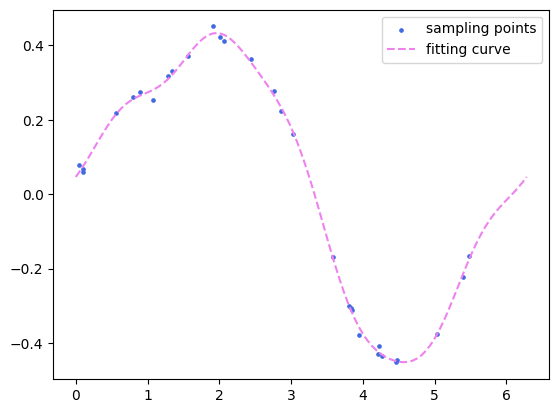

In [84]:
plt.scatter(sampleTheta, sampleS, s=5.5, color="royalBlue", label="sampling points")
plt.plot(np.linspace(0,2*np.pi,100), getS(np.linspace(0,2*np.pi,100)), color="violet", ls="--", label="fitting curve")
plt.legend()

In [85]:
def getSampleR(theta: np.ndarray) -> np.ndarray:
    return 2.5 + 0.9*np.sin(theta) + 0.5*np.cos(2*theta) + 0.2*np.sin(3*theta+2)

def getSampleZ(theta: np.ndarray) -> np.ndarray:
    return 0.3 + 1.3*np.cos(theta+1) + 0.4*np.sin(3*theta) + 0.2*np.sin(4*theta+2)

In [86]:
sampleNums = 60
sampleTheta = np.sort(np.random.rand(sampleNums)) * 2*np.pi
sampleR = getSampleR(sampleTheta)
sampleZ = getSampleZ(sampleTheta)

In [87]:
xm, realCom, imagCom = fitting.fitClosedCurve(sampleR, sampleZ)

In [88]:
def getPoints(theta: np.ndarray, mMax: int=10) -> Tuple[np.ndarray]:
    indexArr = np.where(np.abs(xm)<mMax)
    angleMat = np.dot(xm[indexArr].reshape(-1,1), theta.reshape(1,-1))
    rArr = (
        np.dot(realCom[indexArr].reshape(1,-1), np.cos(angleMat)) - 
        np.dot(imagCom[indexArr].reshape(1,-1), np.sin(angleMat))
    ).flatten()
    zArr = (
        np.dot(realCom[indexArr].reshape(1,-1), np.sin(angleMat)) + 
        np.dot(imagCom[indexArr].reshape(1,-1), np.cos(angleMat))
    ).flatten()
    return rArr, zArr

(0.7996342155392505, 3.3689690535214636, -1.40203300161718, 2.2395227270947298)

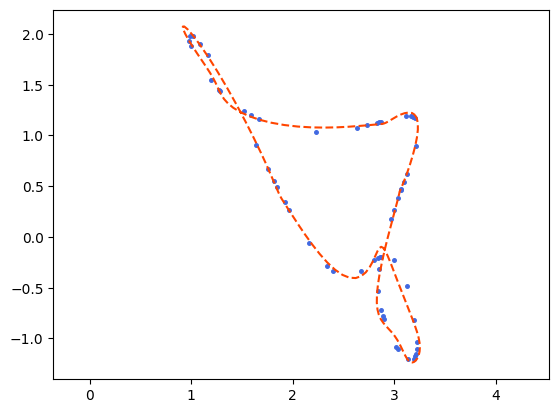

In [89]:
plt.scatter(sampleR, sampleZ, s=6.5, color="royalBlue", label="sampling points")
angle = np.linspace(0, 2*np.pi, 150)
rArr, zArr = getPoints(angle)
plt.plot(rArr, zArr, color="orangered", ls="--", label="fitting curve")
plt.axis("equal")
